In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# ==================================================
# @file testSOM.ipynb
# @author K.ISO
# @brief SOMクラスのテスト
# ==================================================


# ==================================================
# import
# ==================================================

from SOM import SOM
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## SOMの初期化

In [ ]:
resolution = 20
observe_dim = 3
som = SOM(
    resolution = 20,
    observe_dim = 3
)

## テストデータの作成 

In [ ]:
input_dim = observe_dim
latent_dim = 2
n_samples = 500
noise = 0.1
random_seed = 100

np.random.seed(random_seed)
z = np.random.uniform(-1, 1, size=(n_samples, latent_dim))
data = np.empty((n_samples, input_dim))
data[:, 0] = z[:, 0]
data[:, 1] = z[:, 1]
data[:, 2] = z[:, 0] ** 2 - z[:, 1] ** 2 # 特定のデータの形状を作るため．
data += np.random.normal(scale=noise, size=(n_samples, input_dim))

## SOMのフィッティング

In [ ]:
som.pcaInitialize(data)
for i in range(10):
    winner_node = som.detectWinnerNode(data)
    gauss_field = som.getGauss(winner_node, i)
    som.overWriteNode(data, gauss_field)

## フィッティング結果の可視化

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax_latent = fig.add_subplot(121)
# som_zeta = som.getSOM()
# som_zeta = som_zeta.reshape(-1, input_dim)
w_axis = np.arange(resolution)
d_axis = np.arange(resolution)
meshgrid = np.meshgrid(w_axis, d_axis)
zeta = np.dstack(meshgrid).reshape(-1, 2)
ax_latent.scatter(zeta[:, 0], zeta[:, 1], s=50, alpha=0.5)
ax_latent.scatter(winner_node[0], winner_node[1], s=5, color='black')
wf = som.getSOM()
ax_observable = fig.add_subplot(122, projection='3d')
ax_observable.plot_wireframe(wf[:, :, 0], wf[:, :, 1], wf[:, :, 2])
ax_observable.scatter(data[:, 0], data[:, 1], data[:, 2], marker='x', color='red', s=10)
plt.show()

## 潜在空間の保存

In [ ]:
som.save()

## 潜在空間の読み込み

In [5]:
resolution = 20
observe_dim = 3
som = SOM(
    resolution = 20,
    observe_dim = 3
)
som.load()

## テスト

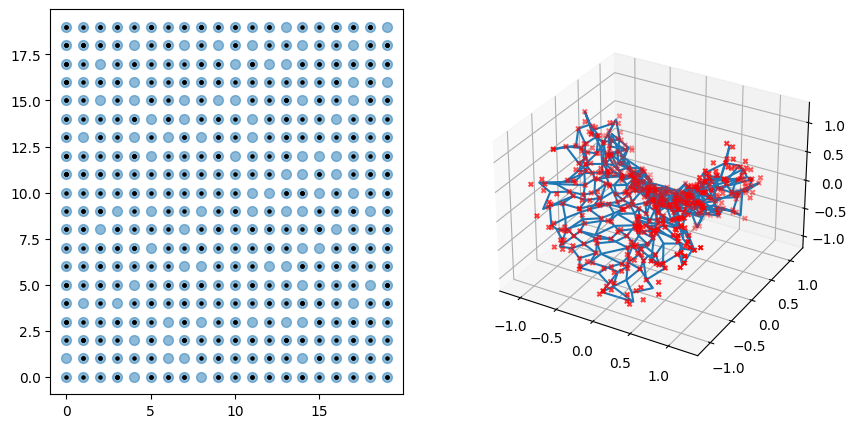

In [6]:
input_dim = observe_dim
latent_dim = 2
n_samples = 500
noise = 0.1
random_seed = 100

np.random.seed(random_seed)
z = np.random.uniform(-1, 1, size=(n_samples, latent_dim))
data = np.empty((n_samples, input_dim))
data[:, 0] = z[:, 0]
data[:, 1] = z[:, 1]
data[:, 2] = z[:, 0] ** 2 - z[:, 1] ** 2 # 特定のデータの形状を作るため．
data += np.random.normal(scale=noise, size=(n_samples, input_dim))
winner_node = som.detectWinnerNode(data)
fig = plt.figure(figsize=(10, 5))
ax_latent = fig.add_subplot(121)
w_axis = np.arange(resolution)
d_axis = np.arange(resolution)
meshgrid = np.meshgrid(w_axis, d_axis)
zeta = np.dstack(meshgrid).reshape(-1, 2)
ax_latent.scatter(zeta[:, 0], zeta[:, 1], s=50, alpha=0.5)
ax_latent.scatter(winner_node[0], winner_node[1], s=5, color='black')
wf = som.getSOM()
ax_observable = fig.add_subplot(122, projection='3d')
ax_observable.plot_wireframe(wf[:, :, 0], wf[:, :, 1], wf[:, :, 2])
ax_observable.scatter(data[:, 0], data[:, 1], data[:, 2], marker='x', color='red', s=10)
plt.show()